In [19]:
import os
import pandas as pd

root_path = os.getcwd()
white_wine = pd.read_csv(root_path+"/winequality-white.csv",sep=";")
red_wine = pd.read_csv(root_path+"/winequality-red.csv",sep=";")


In [20]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] =r"./service_acc/service_acc.json"



In [18]:
import mlflow
mlflow.set_tracking_uri("gs://ths_test_dvc/mlflow_test")
mlflow.set_experiment("gcs_test")

with mlflow.start_run():
    mlflow.log_param("a", 1)
    mlflow.log_artifact("winequality-red.csv")

UnsupportedModelRegistryStoreURIException:  Model registry functionality is unavailable; got unsupported URI 'gs://ths_test_dvc/mlflow_test' for model registry data storage. Supported URI schemes are: ['', 'file', 'databricks', 'databricks-uc', 'uc', 'http', 'https', 'postgresql', 'mysql', 'sqlite', 'mssql']. See https://www.mlflow.org/docs/latest/tracking.html#storage for how to run an MLflow server against one of the supported backend storage locations.

In [21]:
print(white_wine.shape)
white_wine.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
white_wine["is_red"] = 0
red_wine["is_red"] = 1

data = pd.concat([red_wine,white_wine])
print(data.shape)
data.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [23]:
data.rename(columns= lambda x : x.replace(" ","_"),inplace=True)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [24]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


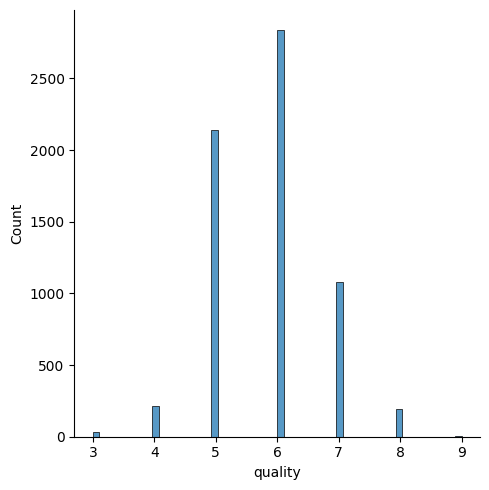

In [25]:
import seaborn as sns
sns.displot(data.quality)

In [26]:
x = data.drop(["quality"],axis=1)
y = data.quality

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [28]:
X_test.shape

(975, 12)

In [29]:
import mlflow
import time
from mlflow.models import infer_signature


In [30]:
# # Create a new MLflow Experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080/")
time.sleep(5)
experiment_id = "v4_test"
print("experiment_id : ",experiment_id)
mlflow.set_experiment(experiment_id)

experiment_id :  v4_test


<Experiment: artifact_location='gs://ths_test_dvc/mlflow_test/583180524462231011', creation_time=1760126392776, experiment_id='583180524462231011', last_update_time=1760126392776, lifecycle_stage='active', name='v4_test', tags={}>

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [16]:
mlflow.sklearn.autolog()

# for GPU info please install this
# pip install pynvml

mlflow.enable_system_metrics_logging()

In [31]:
with mlflow.start_run(log_system_metrics = True,run_name="ths_run4") as run:
    time.sleep(5)

    n_estimators = 100
    max_depth = 10
    max_features = 15
    
    
    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    
    
    rf.fit(X_train,y_train)
    signature = infer_signature(X_test, rf.predict(X_test))
   

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="red_white_wine_model",
        signature=signature,
        input_example=X_test
    )
    


2025/10/11 03:02:29 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/10/11 03:02:29 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2025/10/11 03:02:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths_dev/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <http

🏃 View run ths_run4 at: http://127.0.0.1:8080/#/experiments/583180524462231011/runs/678309334b5649ce87360ecf488da26d
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/583180524462231011


In [ ]:
model_uri = model_info.model_uri
model_uri

'runs:/333103baeaf54fa3a2d03ea5d0767dc7/red_white_wine_model'

In [ ]:
model_name = "wine_model"
model_version = mlflow.register_model(model_uri,model_name)

Registered model 'wine_model' already exists. Creating a new version of this model...
2025/10/11 01:18:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: wine_model, version 3
Created version '3' of model 'wine_model'.


In [ ]:
model_version

<ModelVersion: aliases=[], creation_timestamp=1760120305197, current_stage='None', description='', last_updated_timestamp=1760120305197, name='wine_model', run_id='333103baeaf54fa3a2d03ea5d0767dc7', run_link='', source='mlflow-artifacts:/713560848583162646/333103baeaf54fa3a2d03ea5d0767dc7/artifacts/red_white_wine_model', status='READY', status_message=None, tags={}, user_id='', version='3'>

In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.set_registered_model_alias(name=model_name,version=model_version.version,alias="prod")

In [ ]:

register_model_uri = f"models:/{model_name}@prod"
print(register_model_uri)
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(register_model_uri)




models:/wine_model@prod


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
result = loaded_model.predict(X_test)
score = mean_squared_error(y_test,result)
print(score)

2025/10/11 01:18:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths_dev/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


0.41878622577234603
